<a href="https://colab.research.google.com/github/ShlokArora2709/Mentorness_Internship/blob/main/Mentorness_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import plotly.graph_objects as go

In [42]:
df= pd.read_csv('/content/drive/MyDrive/Copy of goldstock.csv')
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [44]:
df=df.drop(df.columns[0],axis=1)
df

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [45]:
df["Date"] = pd.to_datetime(df['Date'])  # Convert date column to datetime
df.set_index("Date", inplace=True)
df

,Close,Volume,Open,High,Low
Date,,,,,
2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...
2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9


In [46]:
df.index

DatetimeIndex(['2024-01-19', '2024-01-18', '2024-01-17', '2024-01-16',
               '2024-01-12', '2024-01-11', '2024-01-10', '2024-01-09',
               '2024-01-08', '2024-01-05',
               ...
               '2014-02-04', '2014-02-03', '2014-01-31', '2014-01-30',
               '2014-01-29', '2014-01-28', '2014-01-27', '2014-01-24',
               '2014-01-23', '2014-01-22'],
              dtype='datetime64[ns]', name='Date', length=2511, freq=None)

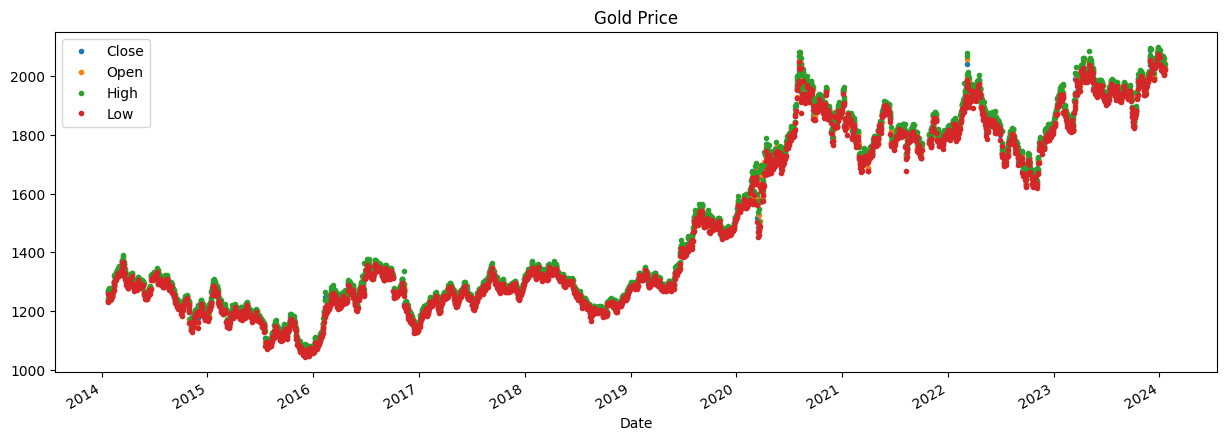

In [53]:
df.drop(['Volume'],axis=1).plot(style='.',
        figsize=(15, 5),
        title='Gold Price')
plt.show()

<Axes: ylabel='Frequency'>

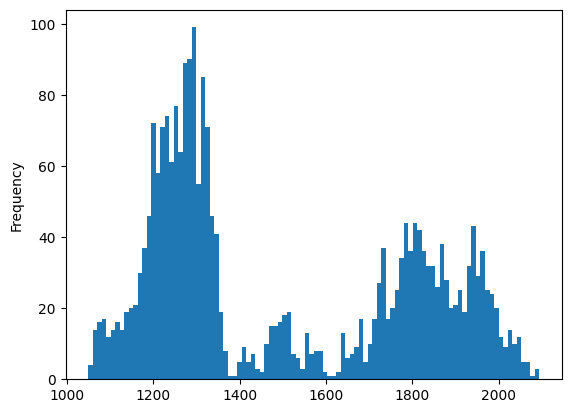

In [52]:
df['Close'].plot(kind='hist', bins=100)

In [ ]:
trace1 = go.Scatter(
    x=df["Date"],
    y=df["Open"],
    name="Open",
    mode="lines",
    marker=dict(color="blue")
)

trace2 = go.Scatter(
    x=df["Date"],
    y=df["Close"],
    name="Close",
    mode="lines",
    marker=dict(color="red")
)




In [ ]:
layout = go.Layout(
    title="Open and Close Prices over Date",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_tickformat="%Y",
)


fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

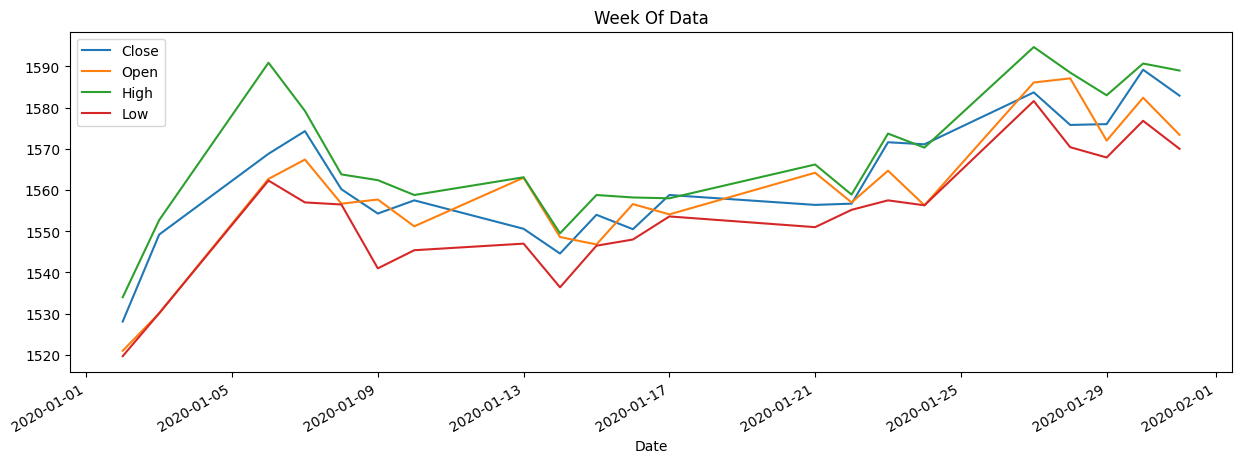

In [62]:
df.drop(['Volume'],axis=1).loc[(df.index > '01-01-2020') & (df.index < '02-01-2020')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [84]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=1)
df = df.sort_index()

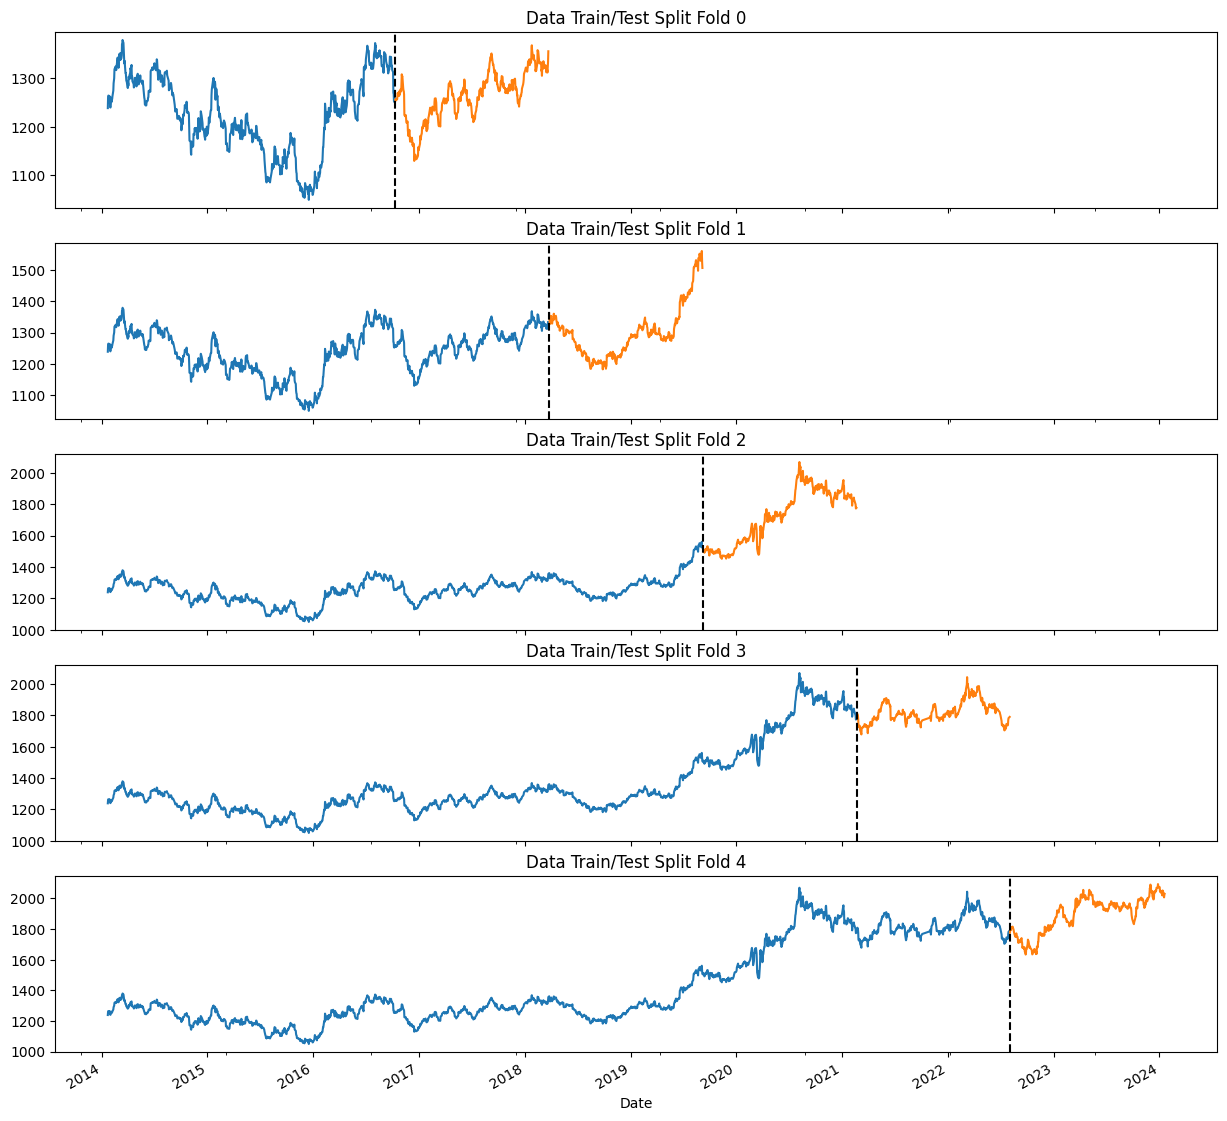

In [85]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['Close'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['Close'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [70]:
df=create_features(df)
df

,Close,Volume,Open,High,Low,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,
2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5,2,1,1,2014,22,22,4
2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8,3,1,1,2014,23,23,4
2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9,4,1,1,2014,24,24,4
2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0,0,1,1,2014,27,27,5
2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0,1,1,1,2014,28,28,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,4,1,1,2024,12,12,2
2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,1,1,1,2024,16,16,3
2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,2,1,1,2024,17,17,3


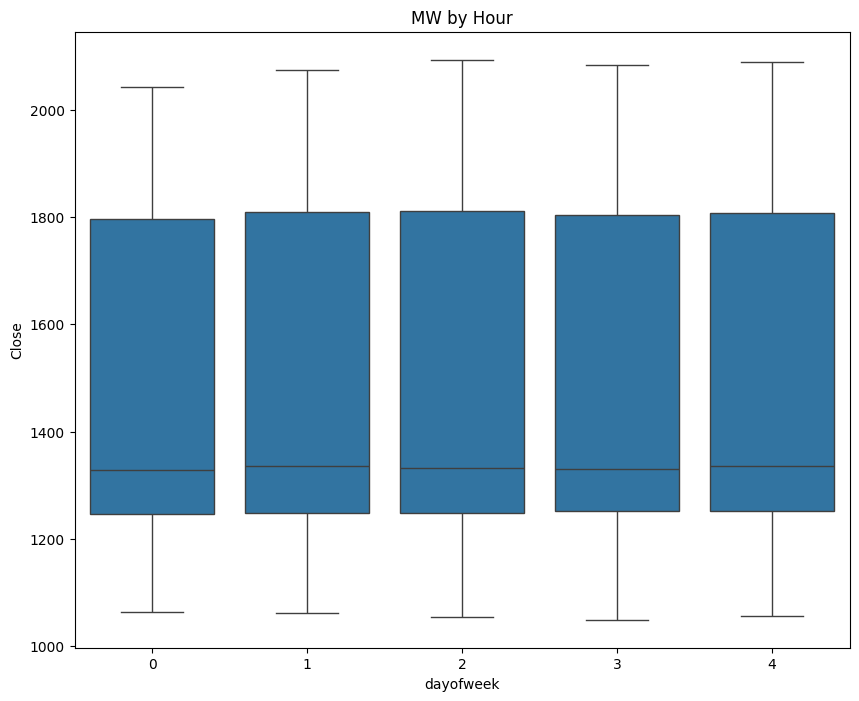

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='Close')
ax.set_title('MW by Hour')
plt.show()

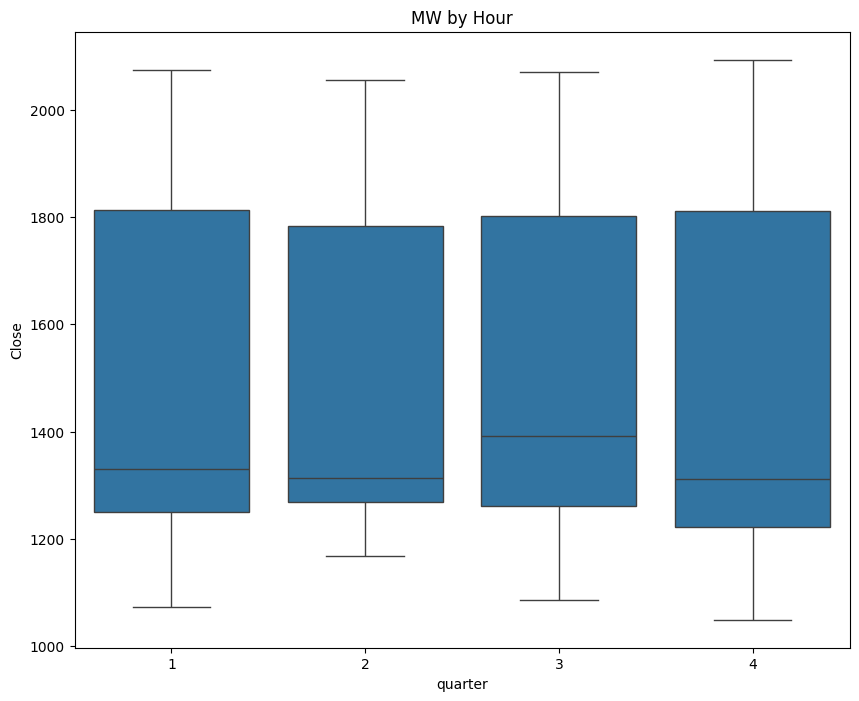

In [75]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Close')
ax.set_title('MW by Hour')
plt.show()

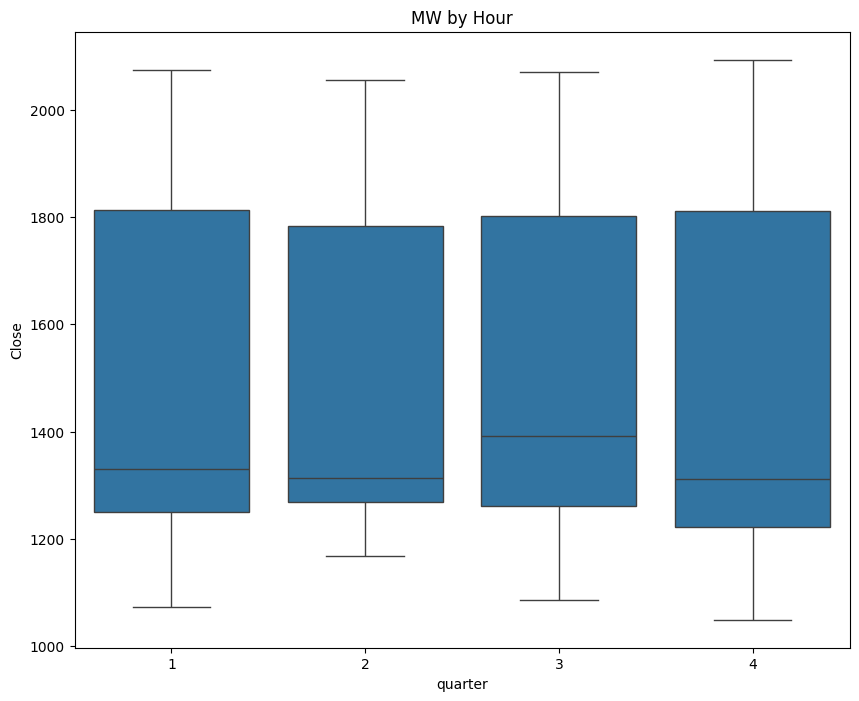

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Close')
ax.set_title('MW by Hour')
plt.show()

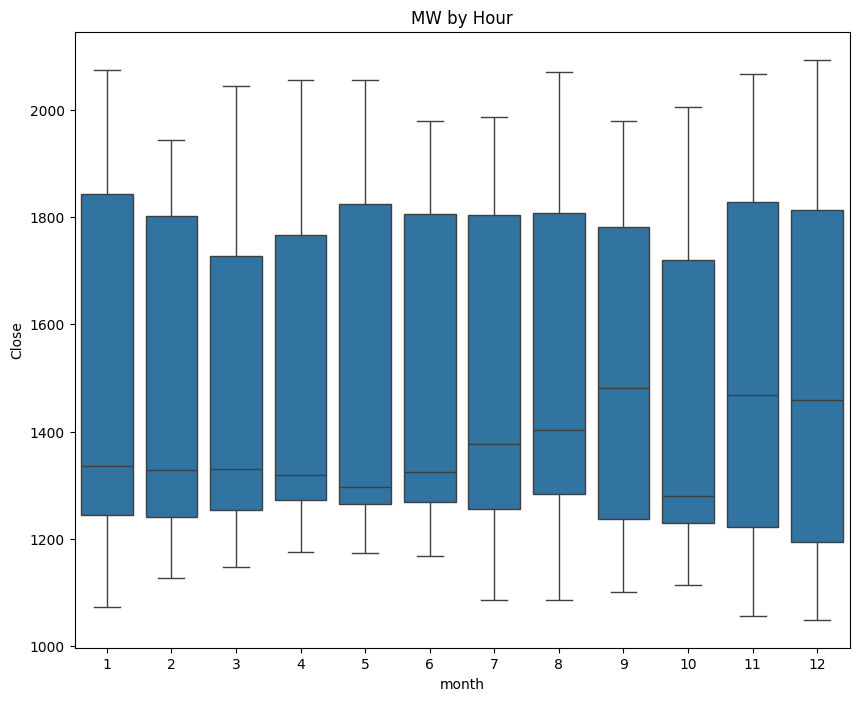

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Close')
ax.set_title('MW by Hour')
plt.show()

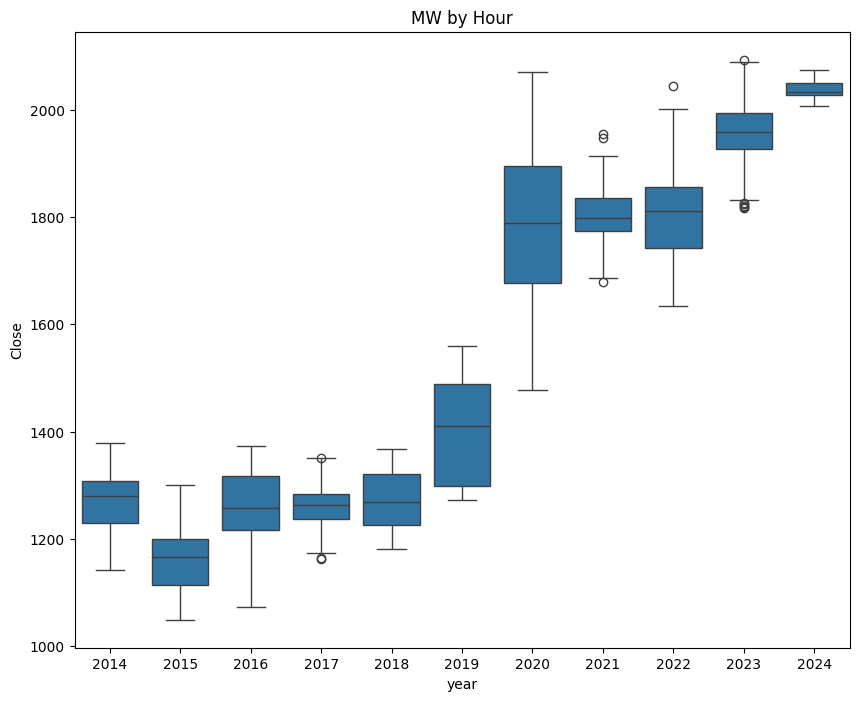

In [78]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='Close')
ax.set_title('MW by Hour')
plt.show()

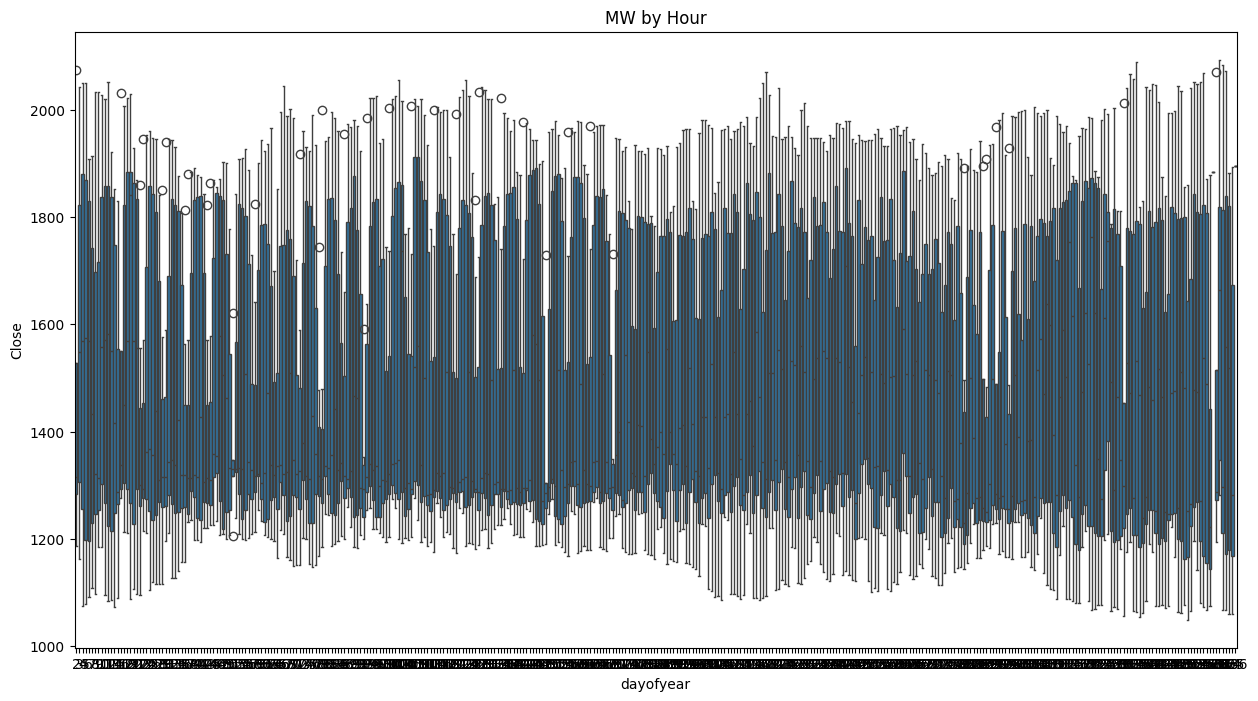

In [83]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=df, x='dayofyear', y='Close')
ax.set_title('MW by Hour')
plt.show()

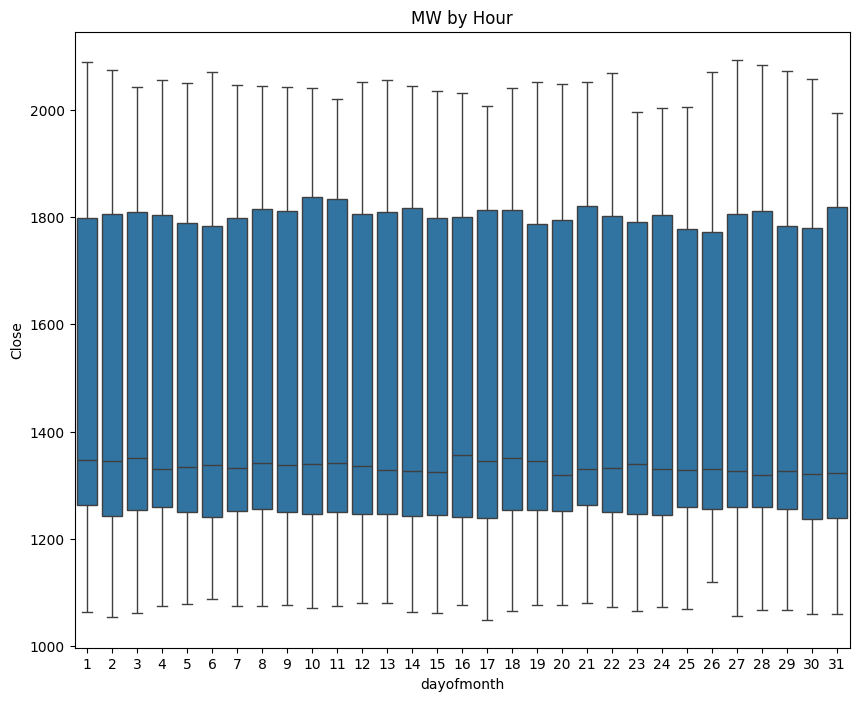

In [80]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofmonth', y='Close')
ax.set_title('MW by Hour')
plt.show()

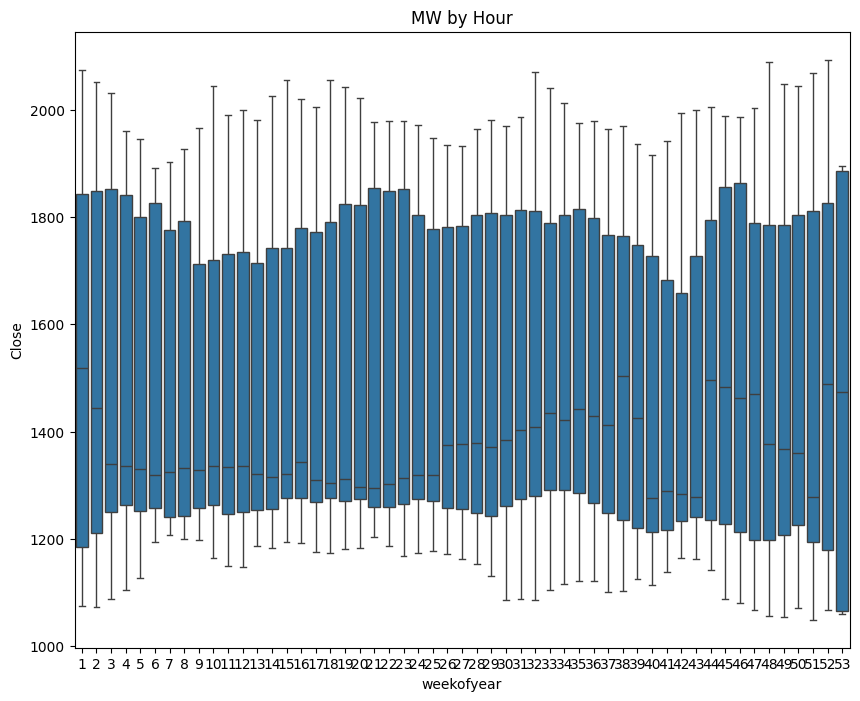

In [81]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='weekofyear', y='Close')
ax.set_title('MW by Hour')
plt.show()

In [71]:
def add_lags(df):
    target_map = df['Close'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [73]:
df = add_lags(df)
df

,Close,Volume,Open,High,Low,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Date,,,,,,,,,,,,,,,
2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5,2,1,1,2014,22,22,4,NaN,NaN,NaN
2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8,3,1,1,2014,23,23,4,NaN,NaN,NaN
2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9,4,1,1,2014,24,24,4,NaN,NaN,NaN
2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0,0,1,1,2014,27,27,5,NaN,NaN,NaN
2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0,1,1,1,2014,28,28,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,4,1,1,2024,12,12,2,1921.7,1816.5,1829.9
2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,1,1,1,2024,16,16,3,1909.9,1812.4,1840.2
2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,2,1,1,2024,17,17,3,1907.0,1845.5,1870.2


In [87]:
tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=1)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'Close'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:1216.20687	validation_1-rmse:1252.63305
[100]	validation_0-rmse:449.08532	validation_1-rmse:513.85504
[200]	validation_0-rmse:168.40339	validation_1-rmse:251.68627


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:54:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:67.41328	validation_1-rmse:164.17913
[400]	validation_0-rmse:34.96512	validation_1-rmse:137.23116
[500]	validation_0-rmse:26.58391	validation_1-rmse:128.89759
[600]	validation_0-rmse:23.70172	validation_1-rmse:126.90493
[700]	validation_0-rmse:21.73142	validation_1-rmse:126.55422
[747]	validation_0-rmse:20.78872	validation_1-rmse:126.57056
[0]	validation_0-rmse:1228.66031	validation_1-rmse:1291.33164
[100]	validation_0-rmse:453.63674	validation_1-rmse:506.44586
[200]	validation_0-rmse:170.46410	validation_1-rmse:206.05131


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:54:39] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:69.23591	validation_1-rmse:109.48693
[400]	validation_0-rmse:36.16057	validation_1-rmse:88.55293
[500]	validation_0-rmse:27.26829	validation_1-rmse:88.15363
[503]	validation_0-rmse:27.15114	validation_1-rmse:88.09472
[0]	validation_0-rmse:1244.84394	validation_1-rmse:1717.32476
[100]	validation_0-rmse:459.73395	validation_1-rmse:886.59019
[200]	validation_0-rmse:172.79292	validation_1-rmse:590.88673


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:54:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:69.81485	validation_1-rmse:486.13094
[400]	validation_0-rmse:36.36125	validation_1-rmse:450.96708
[500]	validation_0-rmse:27.46441	validation_1-rmse:437.23285
[600]	validation_0-rmse:24.70693	validation_1-rmse:432.47236
[658]	validation_0-rmse:23.77463	validation_1-rmse:433.04299
[0]	validation_0-rmse:1353.93642	validation_1-rmse:1802.84658
[100]	validation_0-rmse:500.57584	validation_1-rmse:648.31508
[200]	validation_0-rmse:189.51964	validation_1-rmse:231.36021


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:54:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:79.25540	validation_1-rmse:96.80234
[400]	validation_0-rmse:43.50312	validation_1-rmse:73.23250
[448]	validation_0-rmse:36.78378	validation_1-rmse:73.67799
[0]	validation_0-rmse:1440.33858	validation_1-rmse:1881.52275
[100]	validation_0-rmse:531.88218	validation_1-rmse:733.72630


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:54:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:201.18274	validation_1-rmse:335.57489
[300]	validation_0-rmse:84.78142	validation_1-rmse:205.56330
[400]	validation_0-rmse:47.88344	validation_1-rmse:166.36013
[500]	validation_0-rmse:37.63903	validation_1-rmse:154.14393
[600]	validation_0-rmse:34.26910	validation_1-rmse:151.30030
[700]	validation_0-rmse:32.67518	validation_1-rmse:150.41151
[751]	validation_0-rmse:32.09412	validation_1-rmse:150.55530


In [88]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 173.9335
Fold scores:[126.45965839821736, 87.37681094123579, 432.3142920269437, 73.13387409438602, 150.38303890780003]


In [92]:
df = create_features(df)

FEATURES = ['dayofyear',  'dayofweek', 'quarter', 'month', 'year',
            'lag1','lag2','lag3']
TARGET = 'Close'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=700,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[0]	validation_0-rmse:1512.51763
[100]	validation_0-rmse:558.37610
[200]	validation_0-rmse:211.07965


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:58:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:89.53540
[400]	validation_0-rmse:51.51500
[500]	validation_0-rmse:41.26938
[600]	validation_0-rmse:38.15026
[699]	validation_0-rmse:36.63894


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [93]:
df.index.max()

Timestamp('2024-01-19 00:00:00')

In [94]:
future = pd.date_range('2024-02-20','2025-02-20', freq='1d')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)
future_w_features = df_and_future.query('isFuture').copy()
future_w_features

,Close,Volume,Open,High,Low,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
2024-02-20,NaN,NaN,NaN,NaN,NaN,1,1,2,2024,51,20,8,1842.5,1907.4,1805.9,True
2024-02-21,NaN,NaN,NaN,NaN,NaN,2,1,2,2024,52,21,8,1841.5,1910.4,1797.9,True
2024-02-22,NaN,NaN,NaN,NaN,NaN,3,1,2,2024,53,22,8,1826.8,1926.3,1775.4,True
2024-02-23,NaN,NaN,NaN,NaN,NaN,4,1,2,2024,54,23,8,1817.1,1887.6,1728.8,True
2024-02-24,NaN,NaN,NaN,NaN,NaN,5,1,2,2024,55,24,8,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-16,NaN,NaN,NaN,NaN,NaN,6,1,2,2025,47,16,7,NaN,NaN,NaN,True
2025-02-17,NaN,NaN,NaN,NaN,NaN,0,1,2,2025,48,17,8,NaN,NaN,NaN,True
2025-02-18,NaN,NaN,NaN,NaN,NaN,1,1,2,2025,49,18,8,NaN,1842.5,1907.4,True
2025-02-19,NaN,NaN,NaN,NaN,NaN,2,1,2,2025,50,19,8,NaN,1841.5,1910.4,True


In [95]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

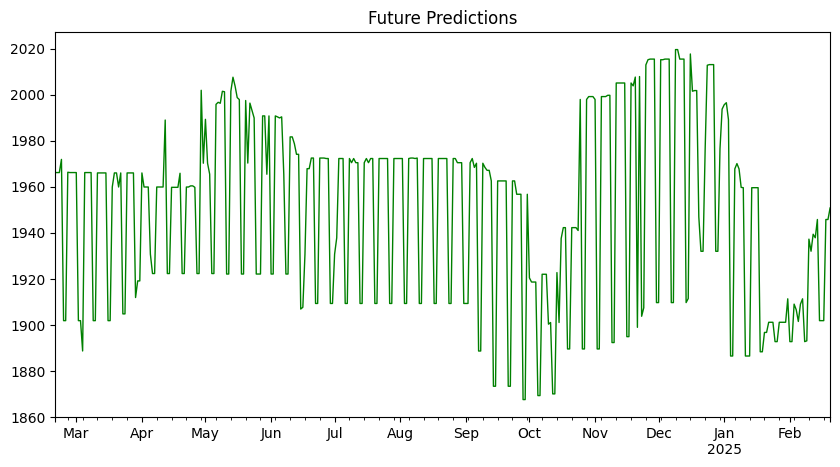

In [97]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color='green',
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()